# Active Links during a Train

In [1]:
import sys
%pylab inline
sys.path.insert(0, '../Script/library3/')
from data_clean_save import *
from utilities import *
from plots import *
print title_list_plot



color_list = sns.color_palette(n_colors=len(title_list_plot))


Populating the interactive namespace from numpy and matplotlib
['DNC_Mail_part2', 'ME', 'CollegeMsg', 'EU', 'sg_infectious_contact', 'primaryschool', 'highschool_2012', 'highschool_2013', 'ht09_contact', 'SFHH', 'tij_lnVS', 'tij_lnVS2', 'Hospital']


In [2]:
def get_link_df(cnt,links = 'links'):
    if links == 'links':
        df = pd.DataFrame(index = cnt.values(),data = cnt.keys()).reset_index()
        df.columns = ['count','n_links','n_train']
    if links == 'sing':
        df = pd.DataFrame(index = cnt.keys(),data = cnt.values())
    if links == 'ego_size_trains': 
        df = pd.Series(cnt).reset_index()
        df.columns = ['degree','n_links', 'n_train', 'count']
    return df

### plot train size of single links, top 10% active links and egonetworks 


In [3]:
import seaborn as sns
def plot_links_most_active_links(save,t_list = title_list_plot,new_data = True,dt = 60,binned = False):
    
    
    
    name_list_ego = [r'$\mathcal{G}_{ego}$',r'$\mathcal{G}_{ego}^1$',r'$\mathcal{G}_{ego}^2$',r'$\mathcal{G}_{ego}^3$']
    name_list_link = [r'$\mathcal{G}_{link}$',r'$\mathcal{G}_{link}^1$',r'$\mathcal{G}_{link}^2$',r'$\mathcal{G}_{link}^3$']
    name_list_active_link = [r'$\mathcal{G}_{top\ links}$',r'$\mathcal{G}_{top link}^1$',r'$\mathcal{G}_{top link}^2$',r'$\mathcal{G}_{top link}^3$']
    
    title_dic_ego = {k:name for k, name in zip(['data','rand1','rand2','rand3'], name_list_ego)}
    color_dic = {k:name for k, name in zip(['data','rand1','rand2','rand3'], ['b','r','g','y'])}
    title_dic_link = {k:name for k, name in zip(['data','rand1','rand2','rand3'], name_list_link)}
    title_dic_active_link = {k:name for k, name in zip(['data','rand1','rand2','rand3'], name_list_active_link)}
    print t_list
    
    
    #fig,axes = plt.subplots(ncols=2,nrows=len(t_list)/2,figsize = (12,9))
    if len(t_list)>9: 
        fig, axes = plt.subplots(ncols=2, nrows=len(t_list)/2,figsize=(12,26))
        str_tot = 'all'
    elif len(t_list) == 4: 
        fig, axes = plt.subplots(ncols=2, nrows= 2,figsize=(16,12))
        str_tot = 'mail'
    elif len(t_list) == 9: 
        fig, axes = plt.subplots(ncols=3, nrows= 3,figsize=(23,18))
        str_tot = 'physical'
    
    plt.subplots_adjust(hspace = 0.4)
    plt.subplots_adjust(wspace = 0.4)
    
    print t_list

    for i,title1 in enumerate(t_list):
    
        
        print title1,title_to_paper_name[title1]
        color_dic_burst = {k:v for k,v in zip(['data','rand1','rand2','rand3'],['b','r','g','y'])}
        tot_burst_cnt = joblib.load('../Results/Bursty_trains/Total_Counter/tot_rand_burst_size_cnt.joblib')
        
        
        dt_list = [dt]
        for dt in dt_list:
            
            if binned: bins =  get_bins(tot_burst_cnt,title1,dt,31,clean_cnt1 = True,log_bin = True,shift_zero = False,verbose = True)
    
            
            cnt_tot_active = joblib.load('../Results/Bursty_trains_most_active/'+title1+'_'+str(dt)+'.joblib')       
            
            k ='data'
                
            act_ser = pd.Series(cnt_tot_active[title1])/sum(pd.Series(cnt_tot_active[title1]))
            print i,title1, dt,k
            tot_burst = pd.Series(tot_burst_cnt[title1][dt][k])
            if binned: tot_burst = binned_sr(tot_burst,bins)
                
            
            axes.flatten()[i].plot(tot_burst.index,tot_burst.values,marker = 'o',label = title_dic_ego[k],color = 'b',linestyle = '--')
            
            
            sing_link2 = pd.Series(joblib.load('../Results/Bursty_trains/'+title1+'/'+title1+'_'+str(dt)+'.joblib')[0])
            sing_link2 = sing_link2/sum(sing_link2)
            if binned: sing_link2 = binned_sr(sing_link2,bins)
            axes.flatten()[i].plot(sing_link2.index,sing_link2.values,marker = 'o',label = title_dic_link[k],color = 'r',linestyle = '--')  
            if binned: 
                act_ser = binned_sr(act_ser,bins)
            
            axes.flatten()[i].plot(act_ser.index,act_ser.values,marker = 'o',label = title_dic_active_link[k],color = 'g',linestyle = '--')  
            
            try: 
                print sum(act_ser),sum(sing_link2)
                print len(act_ser),len(sing_link2)
            except: 
                print sum(act_ser),sum(sing_link)
                print len(act_ser),len(sing_link)
            
            axes.flatten()[i].loglog()
            #axes.flatten()[i].set_ylabel(r'$\frac{E[\mathcal{M}|\mathcal{E}_{\Delta t}=s]}{s}$',size = 13)
            
            
            axes.flatten()[i].set_ylabel(r'$Pr[\mathcal{E}_{\Delta t} = s]$',size = 30)
            axes.flatten()[i].set_xlabel(r'$s$',size = 30)
            max1 = max(tot_burst_cnt[title1][dt]['data'].keys())
#             axes.flatten()[i].plot(np.arange(1,max1),1./np.arange(1,max1),label = r'$\frac{1}{s}$',linestyle = '--',color = 'k')
#             axes.flatten()[i].plot(np.arange(1,max1),2./np.arange(1,max1),label = r'$\frac{2}{s}$',linestyle = '-.',color = 'k')
            if len(t_list) == 4: axes.flatten()[i].legend(loc = 'lower left',prop = {'size':17})
            else:axes.flatten()[i].legend(loc = 'lower left',prop = {'size':17})
            axes.flatten()[i].set_title(title_to_paper_name[title1], size = 30)
            axes.flatten()[i].tick_params(axis='x', labelsize=25)
            axes.flatten()[i].tick_params(axis='y', labelsize=25)
            
    if save:
            if t_list == mail_list: d = '_mail'
            elif t_list == human_contact_list: d = '_physical'
            bin_s = ''
            if binned: bin_s = bin_s + 'bin'
            
            else: 
                if len(t_list) == 4:
                    if dt == 60:
                        plt.savefig('../Results/Plots/Bursty_trains/fig9.eps',format = 'eps',bbox_inches = 'tight')
                    
                    if dt == 120:
                        plt.savefig('../Results/Plots/Bursty_trains/fig10.eps',format = 'eps',bbox_inches = 'tight')

                if len(t_list) == 9:
                    if dt == 60:
                        plt.savefig('../Results/Plots/Bursty_trains/fig22.eps',format = 'eps',bbox_inches = 'tight')
                    
                    if dt == 120:
                        plt.savefig('../Results/Plots/Bursty_trains/fig23.eps',format = 'eps',bbox_inches = 'tight')
                plt.show()

                #plt.savefig('/Users/albertoceria/Desktop/Temporal_Network/plot_results/burst_train_analysis_link2'+s+'/link'+str(dt)+'_most_active'+d+'_'+str_tot+bin_s+'.eps',format = 'eps',bbox_inches = 'tight')
            plt.clf()
    else:plt.show()
    #plt.plot(np.arange(1,4000),1./np.arange(1,4000))
    #plt.plot(np.arange(1,4000),2./np.arange(1,4000))

['DNC_Mail_part2', 'ME', 'CollegeMsg', 'EU']
['DNC_Mail_part2', 'ME', 'CollegeMsg', 'EU']
DNC_Mail_part2 DNC_2*
0 DNC_Mail_part2 60 data
0.9999999999999999 1.0
5 5
ME ME*
1 ME 60 data
1.0 1.0
19 19
CollegeMsg CM*
2 CollegeMsg 60 data
0.9999999999999999 1.0
16 16
EU EEU*
3 EU 60 data
1.0000000000000002 0.9999999999999999
21 22


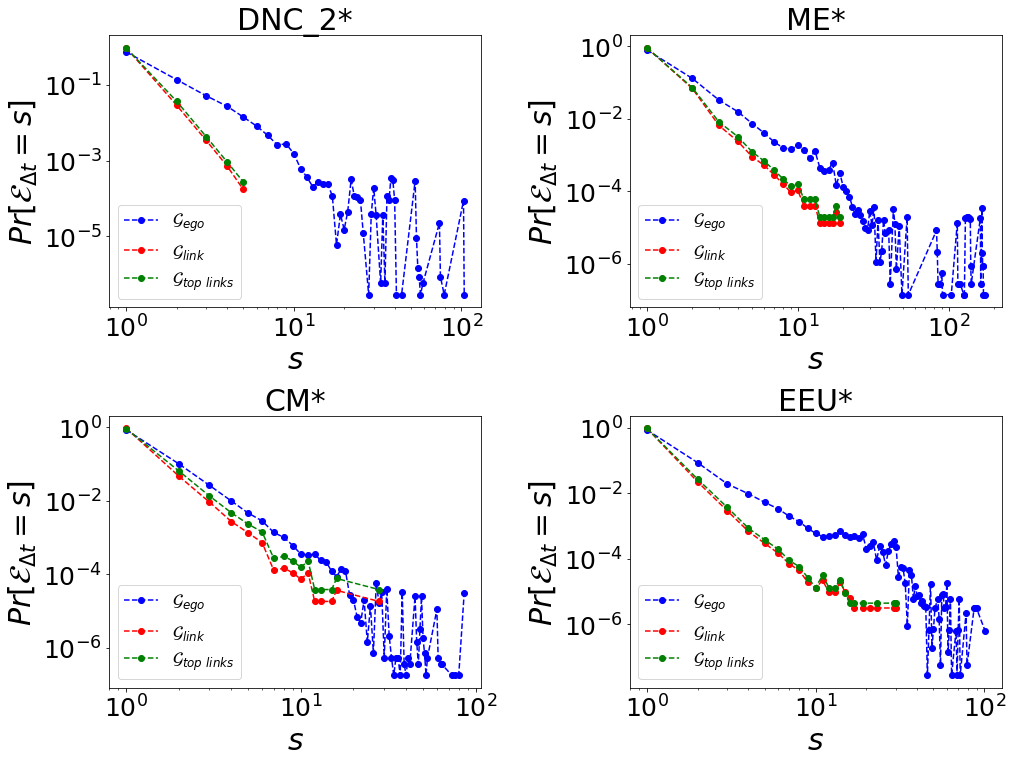

['DNC_Mail_part2', 'ME', 'CollegeMsg', 'EU']
['DNC_Mail_part2', 'ME', 'CollegeMsg', 'EU']
DNC_Mail_part2 DNC_2*
0 DNC_Mail_part2 120 data
1.0 1.0
8 8
ME ME*
1 ME 120 data
1.0 0.9999999999999999
21 21
CollegeMsg CM*
2 CollegeMsg 120 data
0.9999999999999998 1.0000000000000002
27 27
EU EEU*
3 EU 120 data
1.0 1.0
26 27


<Figure size 432x288 with 0 Axes>

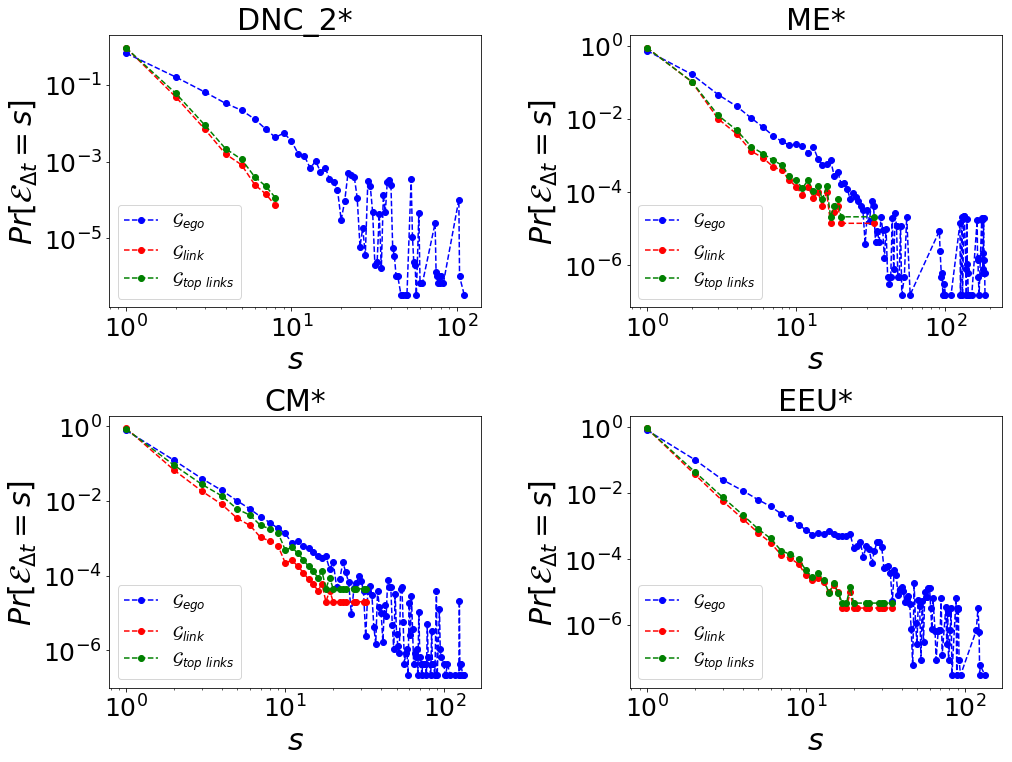

['sg_infectious_contact', 'primaryschool', 'highschool_2012', 'highschool_2013', 'ht09_contact', 'SFHH', 'tij_lnVS', 'tij_lnVS2', 'Hospital']
['sg_infectious_contact', 'primaryschool', 'highschool_2012', 'highschool_2013', 'ht09_contact', 'SFHH', 'tij_lnVS', 'tij_lnVS2', 'Hospital']
sg_infectious_contact Infectious
0 sg_infectious_contact 60 data
0.9999999999999999 1.0
34 34
primaryschool PS
1 primaryschool 60 data
0.9999999999999998 0.9999999999999996
71 71
highschool_2012 HS2012
2 highschool_2012 60 data
1.0 1.0
82 82
highschool_2013 HS2013
3 highschool_2013 60 data
1.0 1.0
174 174
ht09_contact HT2009
4 ht09_contact 60 data
1.0 1.0
59 59
SFHH SFHH
5 SFHH 60 data
0.9999999999999999 0.9999999999999998
97 97
tij_lnVS WP
6 tij_lnVS 60 data
0.9999999999999998 1.0000000000000002
39 39
tij_lnVS2 WP2
7 tij_lnVS2 60 data
1.0000000000000002 0.9999999999999998
101 101
Hospital Hospital
8 Hospital 60 data
0.9999999999999999 1.0
63 64


<Figure size 432x288 with 0 Axes>

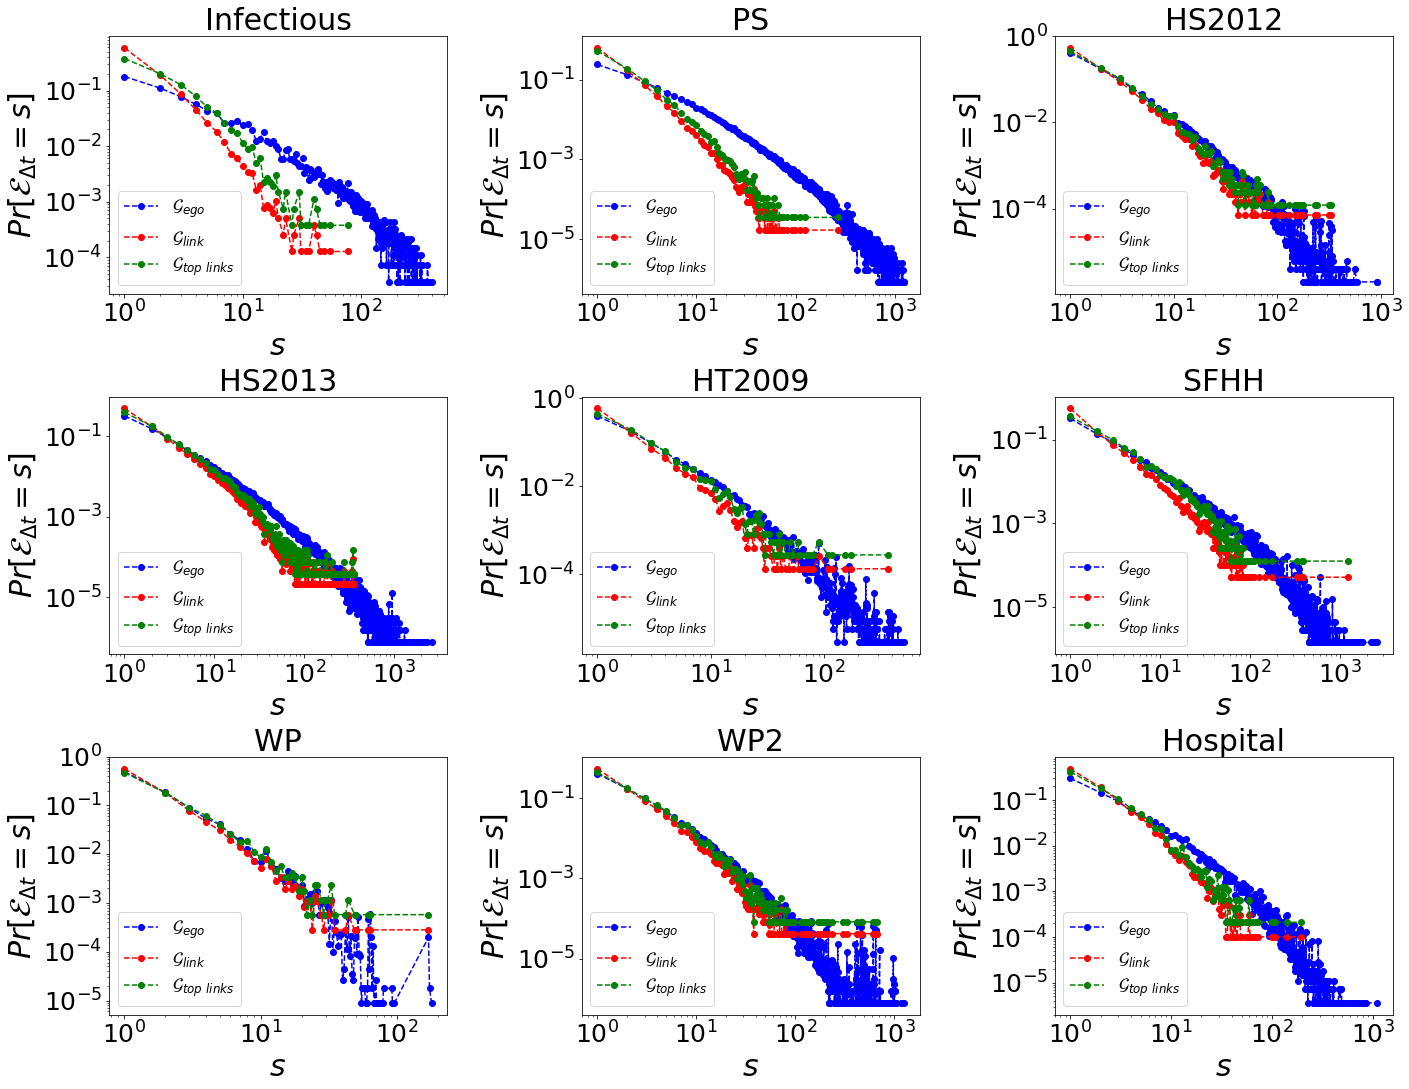

['sg_infectious_contact', 'primaryschool', 'highschool_2012', 'highschool_2013', 'ht09_contact', 'SFHH', 'tij_lnVS', 'tij_lnVS2', 'Hospital']
['sg_infectious_contact', 'primaryschool', 'highschool_2012', 'highschool_2013', 'ht09_contact', 'SFHH', 'tij_lnVS', 'tij_lnVS2', 'Hospital']
sg_infectious_contact Infectious
0 sg_infectious_contact 120 data
1.0 1.0000000000000002
50 50
primaryschool PS
1 primaryschool 120 data
1.0 1.0
97 97
highschool_2012 HS2012
2 highschool_2012 120 data
1.0000000000000002 0.9999999999999998
98 98
highschool_2013 HS2013
3 highschool_2013 120 data
0.9999999999999999 1.0
199 199
ht09_contact HT2009
4 ht09_contact 120 data
0.9999999999999998 0.9999999999999997
68 68
SFHH SFHH
5 SFHH 120 data
1.0 0.9999999999999998
106 106
tij_lnVS WP
6 tij_lnVS 120 data
1.0 1.0
49 49
tij_lnVS2 WP2
7 tij_lnVS2 120 data
0.9999999999999999 0.9999999999999997
113 113
Hospital Hospital
8 Hospital 120 data
0.9999999999999999 0.9999999999999998
77 78


<Figure size 432x288 with 0 Axes>

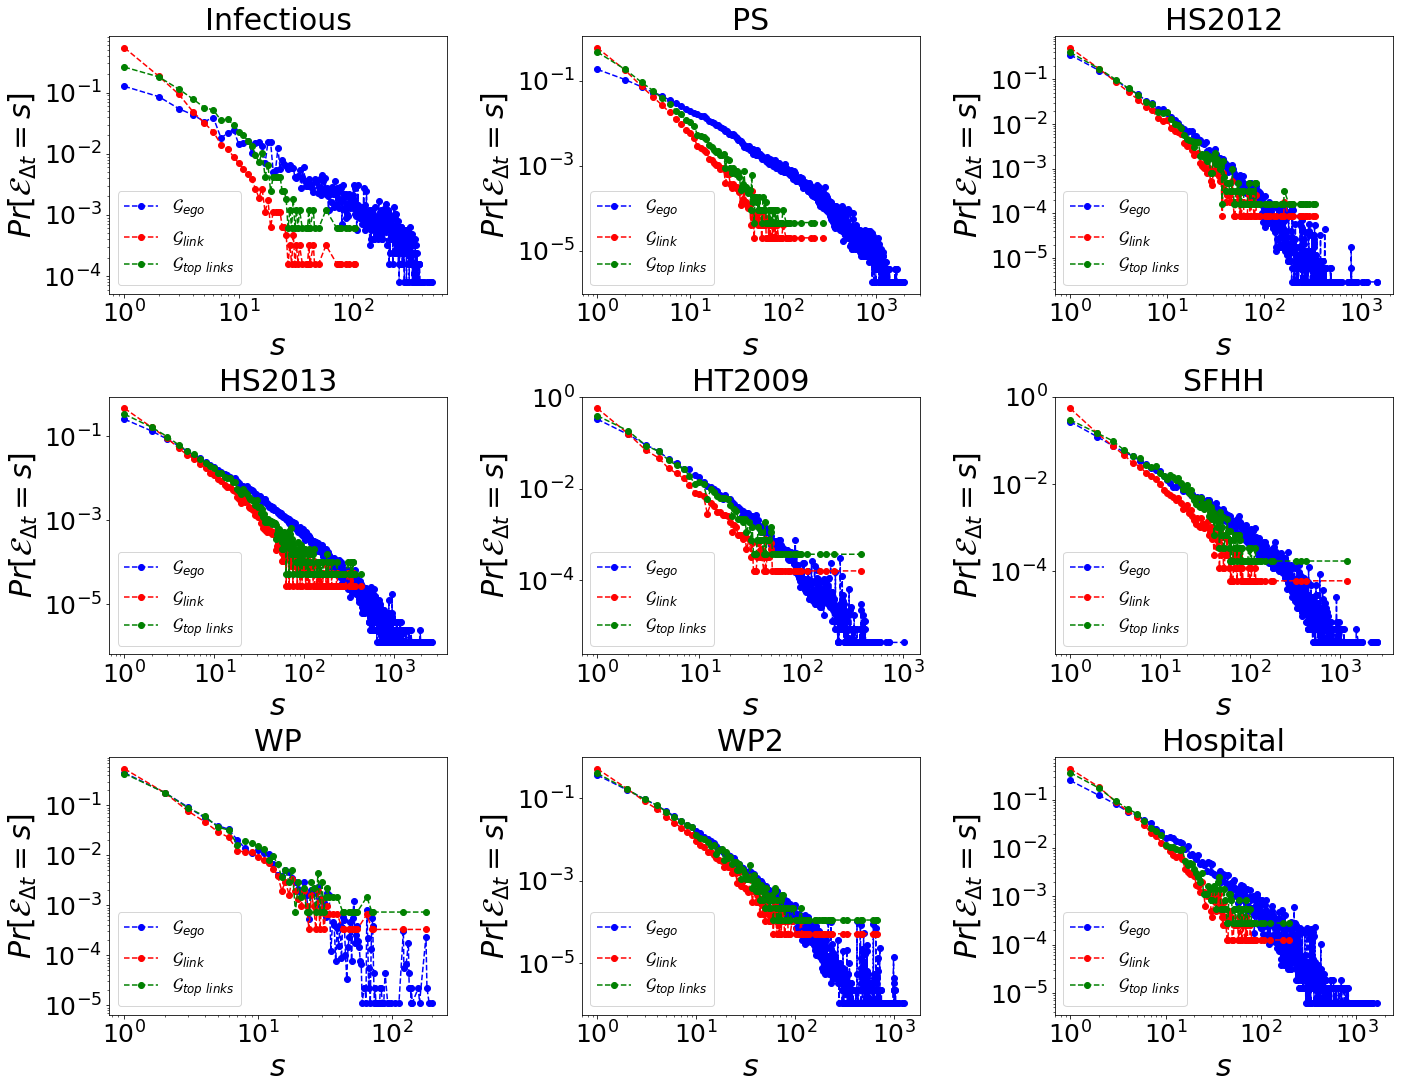

<Figure size 432x288 with 0 Axes>

In [9]:
for t_list in [mail_list,human_contact_list]:
    for dt in [60,120]:
        plot_links_most_active_links(True,t_list = t_list,new_data = True,dt = dt,binned = False)

In [4]:
def get_distr_links(title1,dt,binned = False):
    f2 = joblib.load('../Results/Bursty_trains/'+title1+'/'+title1+'_'+str(dt)+'.joblib')
    if binned: 
        cnt = f2[1]
        bins = get_bins(cnt,title1,dt,31,clean_cnt1 = True,log_bin = True,shift_zero = False,verbose = True)
    
    
    
    f = joblib.load('../Results/Bursty_trains/'+title1+'/'+title1+'_n_links_'+str(dt)+'.joblib')
    df1 = get_link_df(f[0])
    assert sum(df1['count'].values*df1['n_train'].values) == sum([k*v for k,v in f2[1].items()])
    
    if binned: 
        df1['bins'] = pd.cut(df1['n_train'],bins).apply(lambda x: x.mid)
        norm = df1.groupby('bins')['count'].sum()
        print len(norm)
    else: norm = df1.groupby('n_train')['count'].sum()
    
    
    df1['norm_n_links'] = df1.n_links/df1.n_train.apply(lambda x: float(x))
    df1['prod'] = df1['count'] * df1['norm_n_links']
    if binned: return df1.groupby('bins')['prod'].sum()/norm
    else: return df1.groupby('n_train')['prod'].sum()/norm

In [5]:
def get_bins(cnt,title1,dt,bins,clean_cnt1 = True,log_bin = False,shift_zero = False,verbose = True):
     
    if clean_cnt:cnt = clean_cnt(cnt)
    cnt = {k:float(v)/float(sum(cnt.values())) for k,v in cnt.items()}
    range1 = (0.8,max(clean_cnt(cnt).keys())+2)
    print 'max_data: '+str(range1[1])
    if clean_cnt1 ==True: cnt = clean_cnt(cnt)
    keys = np.sort(np.array(cnt.keys()))
    values1 = np.array([cnt[k] for k in keys])
    
    if log_bin  == True:
            bins=np.logspace(np.log10(range1[0]),np.log10(range1[1]),num = bins)
            values1,bins = np.histogram(a=keys,weights=values1,bins = bins)
            
#             print 'set_xscale("log")!'
    else:values1,bins = np.histogram(a=keys,weights=values1,bins = bins,range= range1)
    return bins

In [6]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd


def all_data_comparison_active_links(t_list,save,verbose=False):
    

    

    
    for dt in [60,120,300,600,1200,2400,3600]:
        fig,axes = plt.subplots(ncols=2,nrows=1,figsize = (17,6))
        plt.subplots_adjust(wspace = 0.3)
        for t,title1 in enumerate(t_list):
        
            print title1

            
            a= get_distr_links(title1,dt,binned=True)

            a[a==0] = np.nan
            bins1 =  np.array(a[np.isnan(a)==False].index)
             
            values1 = a[np.isnan(a)==False]
                
            
            
            
                        
          
            
            
            
            if title1 in mail_list: 
                axes[0].plot(a.index.astype(float),a.values,label = title_to_paper_name[title1] ,markersize = 10,marker ='o')
                #axes[0].plot(a.index,a.values,label = title_to_paper_name[title1],markersize = 10,marker ='o')
            else: 
                axes[1].plot(a.index.astype(float),a.values,label = title_to_paper_name[title1],markersize = 10,marker ='o')
                #axes[1].plot(a.index,a.values,label = title_to_paper_name[title1], markersize = 10,marker ='o')
        
        x = np.arange(1,max(pd.Series(joblib.load('../Results/Bursty_trains/Total_Counter/tot_rand_burst_size_cnt.joblib')['SFHH'][dt]['data']).index)*3)
        
        alpha1 =  -0.31
        alpha2 = -0.52
        alpha3 = -0.77
        y1 = np.power(10,alpha1*np.log10(x))
        y2 = np.power(10,alpha2*np.log10(x))
        y3 = np.power(10,alpha3*np.log10(x))


        axes[1].plot(x,y1,linestyle = ':' ,label = r'$\alpha_1$ = '+str(-alpha1),color = 'k')
        axes[1].plot(x,y2,linestyle = '--' ,label = r'$\alpha_2$ = '+str(-alpha2),color = 'k')
        axes[1].plot(x,y3,linestyle = '-.' ,label = r'$\alpha_3$ = '+str(-alpha3),color = 'k')
    
    
        axes[1].set_xscale('log')
        axes[0].set_xscale('log')
        axes[0].set_yscale('log')
        axes[1].set_yscale('log')

    
        axes[1].legend(ncol=3, loc = 'lower center',fontsize = 15)
        
        axes[0].set_ylabel(r'$\frac{E[\mathcal{M}|\mathcal{E}_{\Delta t}=s]}{s}$',size = 30)
        axes[1].set_ylabel(r'$\frac{E[\mathcal{M}|\mathcal{E}_{\Delta t}=s]}{s}$',size = 30)
            
            
        
        
        axes[0].yaxis.offsetText.set_fontsize(45)

        axes[0].set_xlabel(r'$s$',size = 25)
        axes[1].set_xlabel(r'$s$',size = 25)
        
        axes[1].tick_params(axis='both', labelsize=20)
        axes[0].tick_params(which='both',axis='both', labelsize=20)

    
        fig.suptitle(r'$\Delta t = $'+ str(dt)+'s',size = 25)
        
        if save: 
            
            
            plt.savefig('../Results/Plots/Bursty_trains/all_datasets_comparison_'+str(dt)+'binned.eps',bbox_inches = 'tight')
        
        
        plt.show()

DNC_Mail_part2
max_data: 106
30
ME
max_data: 176
30
CollegeMsg
max_data: 88
30
EU
max_data: 103
30
sg_infectious_contact
max_data: 396
30
primaryschool
max_data: 1249
30
highschool_2012
max_data: 927
30
highschool_2013
max_data: 2599
30
ht09_contact
max_data: 517
30
SFHH
max_data: 2581
30
tij_lnVS
max_data: 182
30
tij_lnVS2
max_data: 1269
30
Hospital
max_data: 1109
30


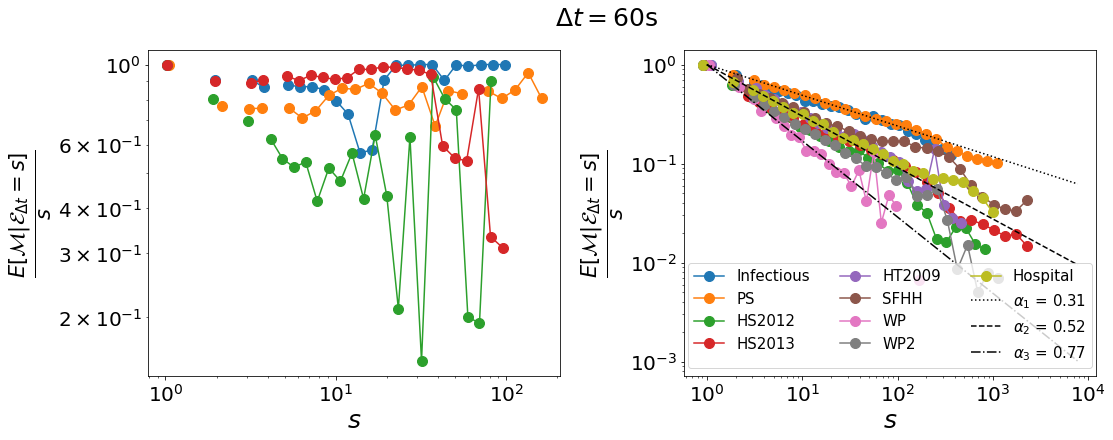

DNC_Mail_part2
max_data: 113
30
ME
max_data: 186
30
CollegeMsg
max_data: 135
30
EU
max_data: 136
30
sg_infectious_contact
max_data: 488
30
primaryschool
max_data: 2031
30
highschool_2012
max_data: 1465
30
highschool_2013
max_data: 2614
30
ht09_contact
max_data: 1026
30
SFHH
max_data: 2625
30
tij_lnVS
max_data: 200
30
tij_lnVS2
max_data: 1269
30
Hospital
max_data: 1649
30


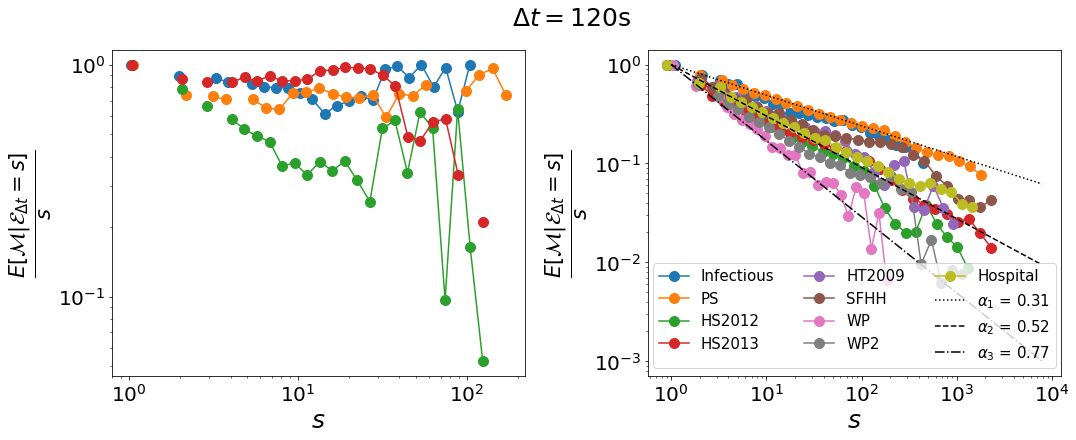

DNC_Mail_part2
max_data: 119
30
ME
max_data: 223
30
CollegeMsg
max_data: 256
30
EU
max_data: 217
30
sg_infectious_contact
max_data: 508
30
primaryschool
max_data: 4574
30
highschool_2012
max_data: 1473
30
highschool_2013
max_data: 2869
30
ht09_contact
max_data: 1229
30
SFHH
max_data: 2726
30
tij_lnVS
max_data: 221
30
tij_lnVS2
max_data: 1269
30
Hospital
max_data: 2595
30


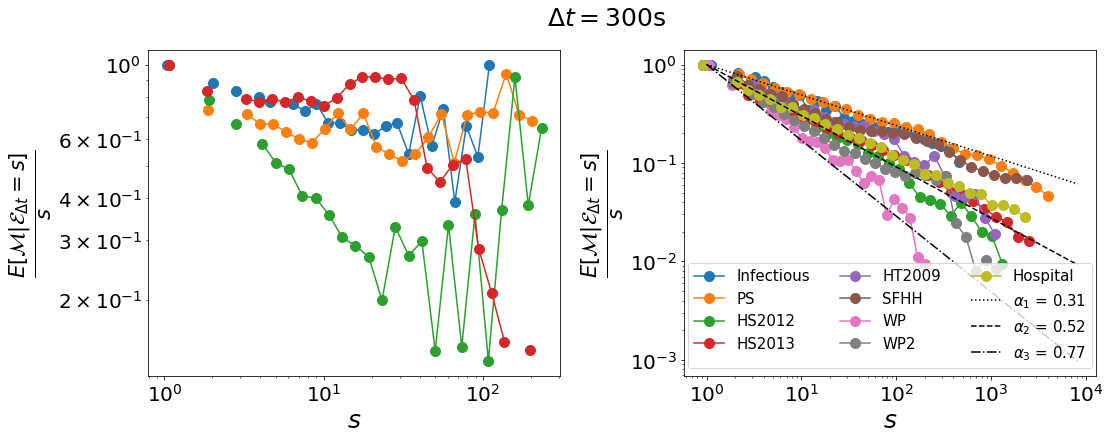

DNC_Mail_part2
max_data: 246
30
ME
max_data: 249
30
CollegeMsg
max_data: 285
30
EU
max_data: 246
30
sg_infectious_contact
max_data: 514
30
primaryschool
max_data: 4651
30
highschool_2012
max_data: 1557
30
highschool_2013
max_data: 5349
30
ht09_contact
max_data: 1777
30
SFHH
max_data: 3207
30
tij_lnVS
max_data: 221
30
tij_lnVS2
max_data: 1737
30
Hospital
max_data: 2595
30


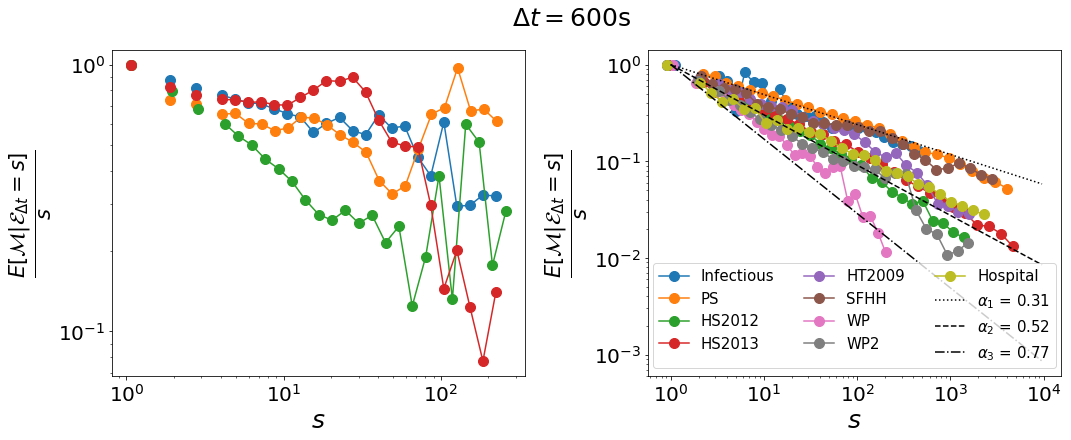

DNC_Mail_part2
max_data: 445
30
ME
max_data: 291
30
CollegeMsg
max_data: 323
30
EU
max_data: 255
30
sg_infectious_contact
max_data: 514
30
primaryschool
max_data: 5084
30
highschool_2012
max_data: 2035
30
highschool_2013
max_data: 5349
30
ht09_contact
max_data: 1781
30
SFHH
max_data: 3211
30
tij_lnVS
max_data: 246
30
tij_lnVS2
max_data: 1739
30
Hospital
max_data: 2721
30


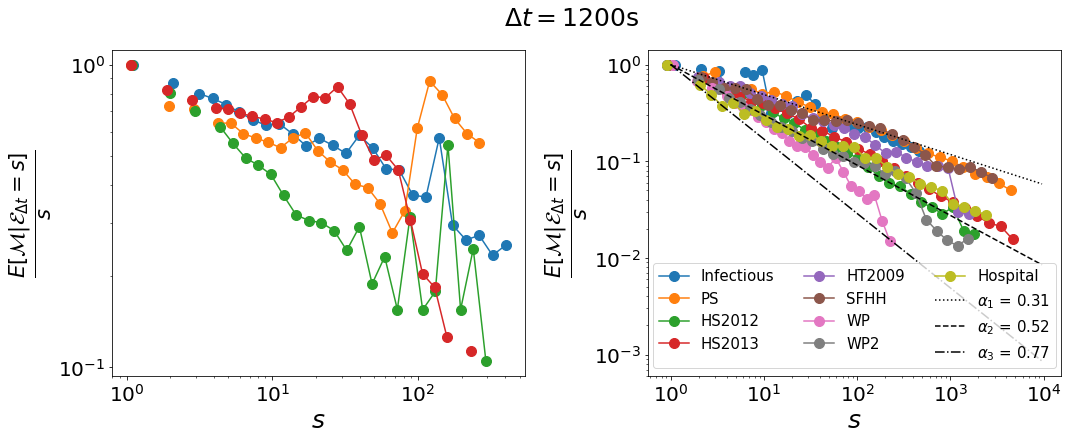

DNC_Mail_part2
max_data: 451
30
ME
max_data: 300
30
CollegeMsg
max_data: 323
30
EU
max_data: 283
30
sg_infectious_contact
max_data: 514
30
primaryschool
max_data: 5084
30
highschool_2012
max_data: 2215
30
highschool_2013
max_data: 8774
30
ht09_contact
max_data: 1799
30
SFHH
max_data: 3211
30
tij_lnVS
max_data: 361
30
tij_lnVS2
max_data: 2660
30
Hospital
max_data: 2723
30


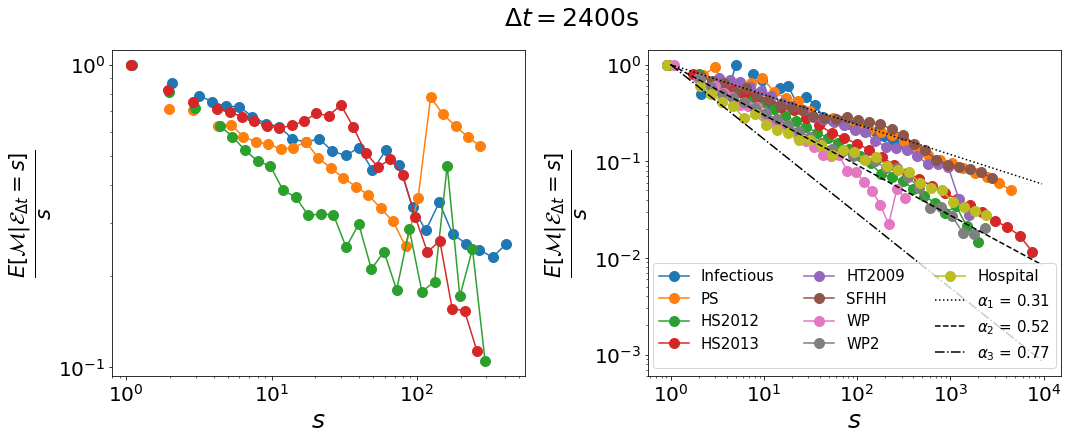

DNC_Mail_part2
max_data: 474
30
ME
max_data: 305
30
CollegeMsg
max_data: 325
30
EU
max_data: 286
30
sg_infectious_contact
max_data: 514
30
primaryschool
max_data: 5084
30
highschool_2012
max_data: 2215
30
highschool_2013
max_data: 8775
30
ht09_contact
max_data: 1799
30
SFHH
max_data: 3211
30
tij_lnVS
max_data: 806
30
tij_lnVS2
max_data: 3079
30
Hospital
max_data: 2723
30


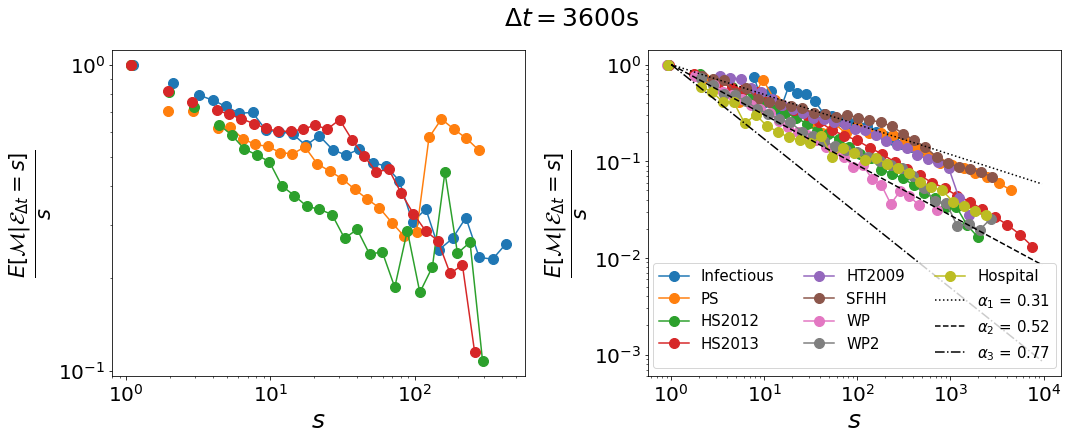

In [8]:
all_data_comparison_active_links(title_list_plot,True)